# Table of Contents

### 1. Check Numerical Columns
### 2. Correlation Matrix Heatmap
### 3. Scatterplots
### 4. Pair Plot
### 5. Box Plot
### 6. Revisit Questions
### 7. New Questions
### 8. Hypotheses

In [29]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [30]:
# Load the dataset
file_path = '/Users/asadagha/Documents/CF Data Analytics/Data Analytics Immersion/Achievement 6/Ex 6.1/Cleaned_Heart_Health_Data.csv'
df = pd.read_csv(file_path)

In [31]:
df.head()

State     Sex GeneralHealth  PhysicalHealth  MentalHealth  \
0  Alabama  Female     Very good             4.0           0.0   
1  Alabama    Male     Very good             0.0           0.0   
2  Alabama    Male     Very good             0.0           0.0   
3  Alabama  Female          Fair             5.0           0.0   
4  Alabama  Female          Good             3.0          15.0   

                                         LastCheckup PhysicalActivities  \
0  Within past year (anytime less than 12 months ...                Yes   
1  Within past year (anytime less than 12 months ...                Yes   
2  Within past year (anytime less than 12 months ...                 No   
3  Within past year (anytime less than 12 months ...                Yes   
4  Within past year (anytime less than 12 months ...                Yes   

   SleepHours            TeethRemoved HadHeartAttack  ... HeightInMeters  \
0         9.0            None of them             No  ...           1.60   
1         6.0            None of them             No  ...           1.78   
2         8.0  6 or more, but not all             No  ...           1.85   
3         9.0            None of them             No  ...           1.70   
4         5.0                  1 to 5             No  ...           1.55   

  WeightInKilograms    BMI AlcoholDrinkers HIVTesting FluVaxLast12  \
0             71.67  27.99              No         No          Yes   
1             95.25  30.13              No         No          Yes   
2            108.86  31.66             Yes         No           No   
3             90.72  31.32              No         No          Yes   
4             79.38  33.07              No         No          Yes   

  PneumoVaxEver          TetanusShot HIVRiskBehaviorsLastYear CovidPositive  
0           Yes                 Tdap                       No            No  
1           Yes  Tetanus Unspecified                       No            No  
2           Yes                   No                       No           Yes  
3           Yes                   No                       No           Yes  
4           Yes                   No                       No            No  

[5 rows x 40 columns]

## 1. Check Numerical Columns

In [33]:
# Check numerical columns and clean any issues
numeric_cols = ['PhysicalHealth', 'MentalHealth', 'SleepHours', 'HeightInMeters', 'WeightInKilograms', 'BMI']

In [34]:
# Convert invalid values to NaN
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

In [35]:
# Fill NaN with median values
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

## 2. Correlation Matrix Heatmap

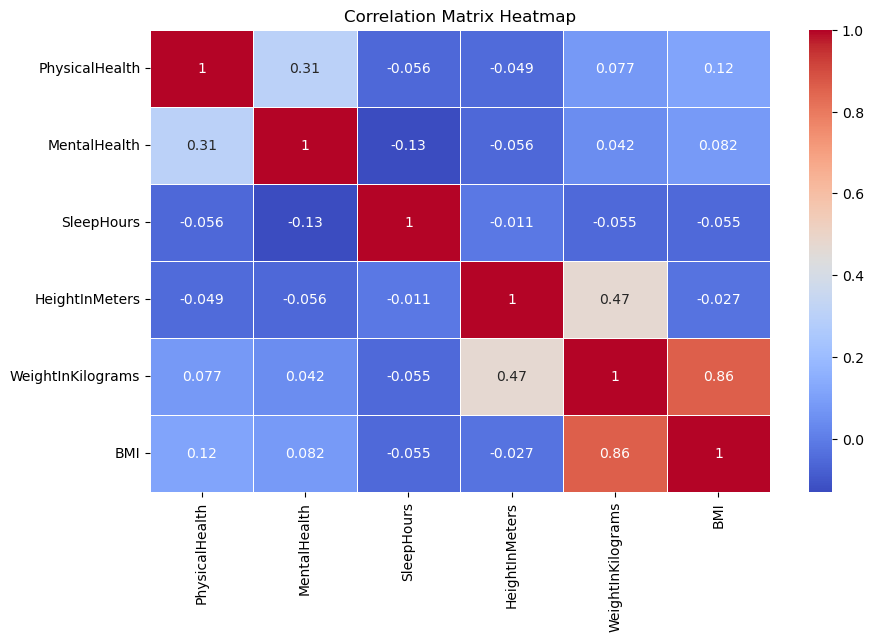

In [37]:
# Correlation matrix heatmap
corr_matrix = df[numeric_cols].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

Key Observations:

Weight and BMI: High positive correlation (0.86) indicates a strong, direct relationship. Not surprising, as BMI is partly derived from weight.

Height and Weight: Moderate positive correlation (0.47) shows that taller individuals tend to weigh more.

PhysicalHealth and MentalHealth: A moderate positive correlation (0.31) suggests that those reporting more days of poor physical health are somewhat likely to also report more days of poor mental health.

## 3. Scatterplots

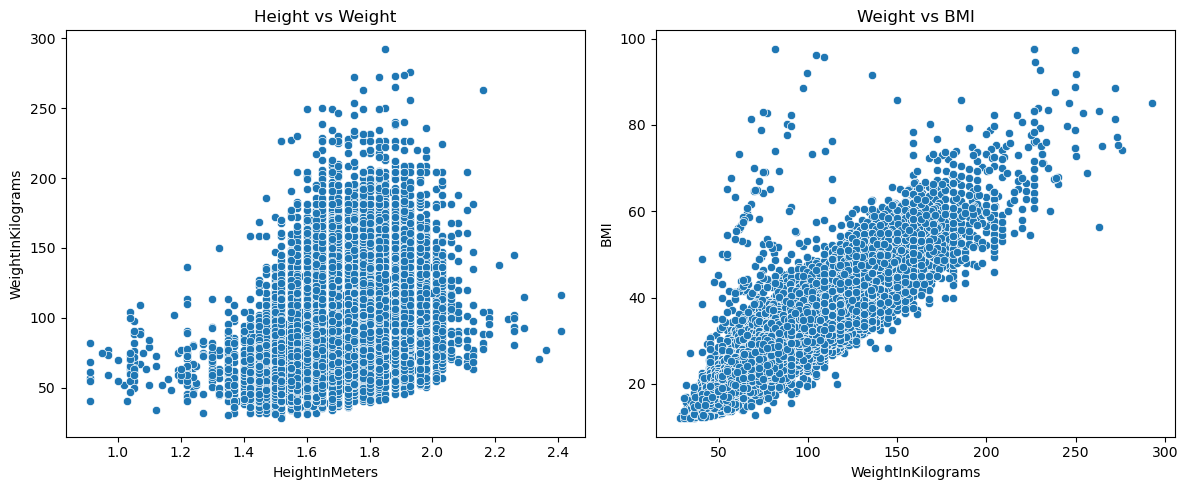

In [40]:
# Scatterplots for strong correlations
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.scatterplot(x='HeightInMeters', y='WeightInKilograms', data=df, ax=axes[0])
axes[0].set_title('Height vs Weight')
sns.scatterplot(x='WeightInKilograms', y='BMI', data=df, ax=axes[1])
axes[1].set_title('Weight vs BMI')
plt.tight_layout()
plt.show()

Height vs. Weight:
The scatterplot shows that as height increases, weight generally increases, forming a broad upward trend. However, there is a lot of scatter, meaning at any given height, individuals can have a wide range of weights.

Weight vs. BMI:
Here we see a tighter, more defined positive relationship. As weight increases, BMI also increases, creating a stronger linear trend. The relationship is evident because BMI is directly influenced by weight (along with height).

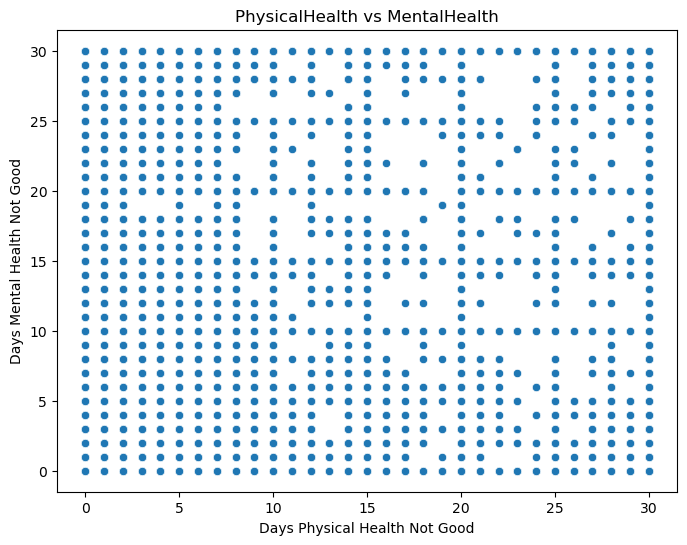

In [42]:
# Scatterplot for PhysicalHealth vs. MentalHealth (lower correlation but it’s still noteworthy due to its public health relevance)
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PhysicalHealth', y='MentalHealth', data=df)
plt.title('PhysicalHealth vs MentalHealth')
plt.xlabel('Days Physical Health Not Good')
plt.ylabel('Days Mental Health Not Good')
plt.show()

Physical Health vs. Mental Health:

The points on the scatterplot are widely spread, meaning the relationship isn’t very strong or consistent. The data forms a grid-like pattern because days are reported in whole numbers, and a wide range of values.

## 4. Pair Plot

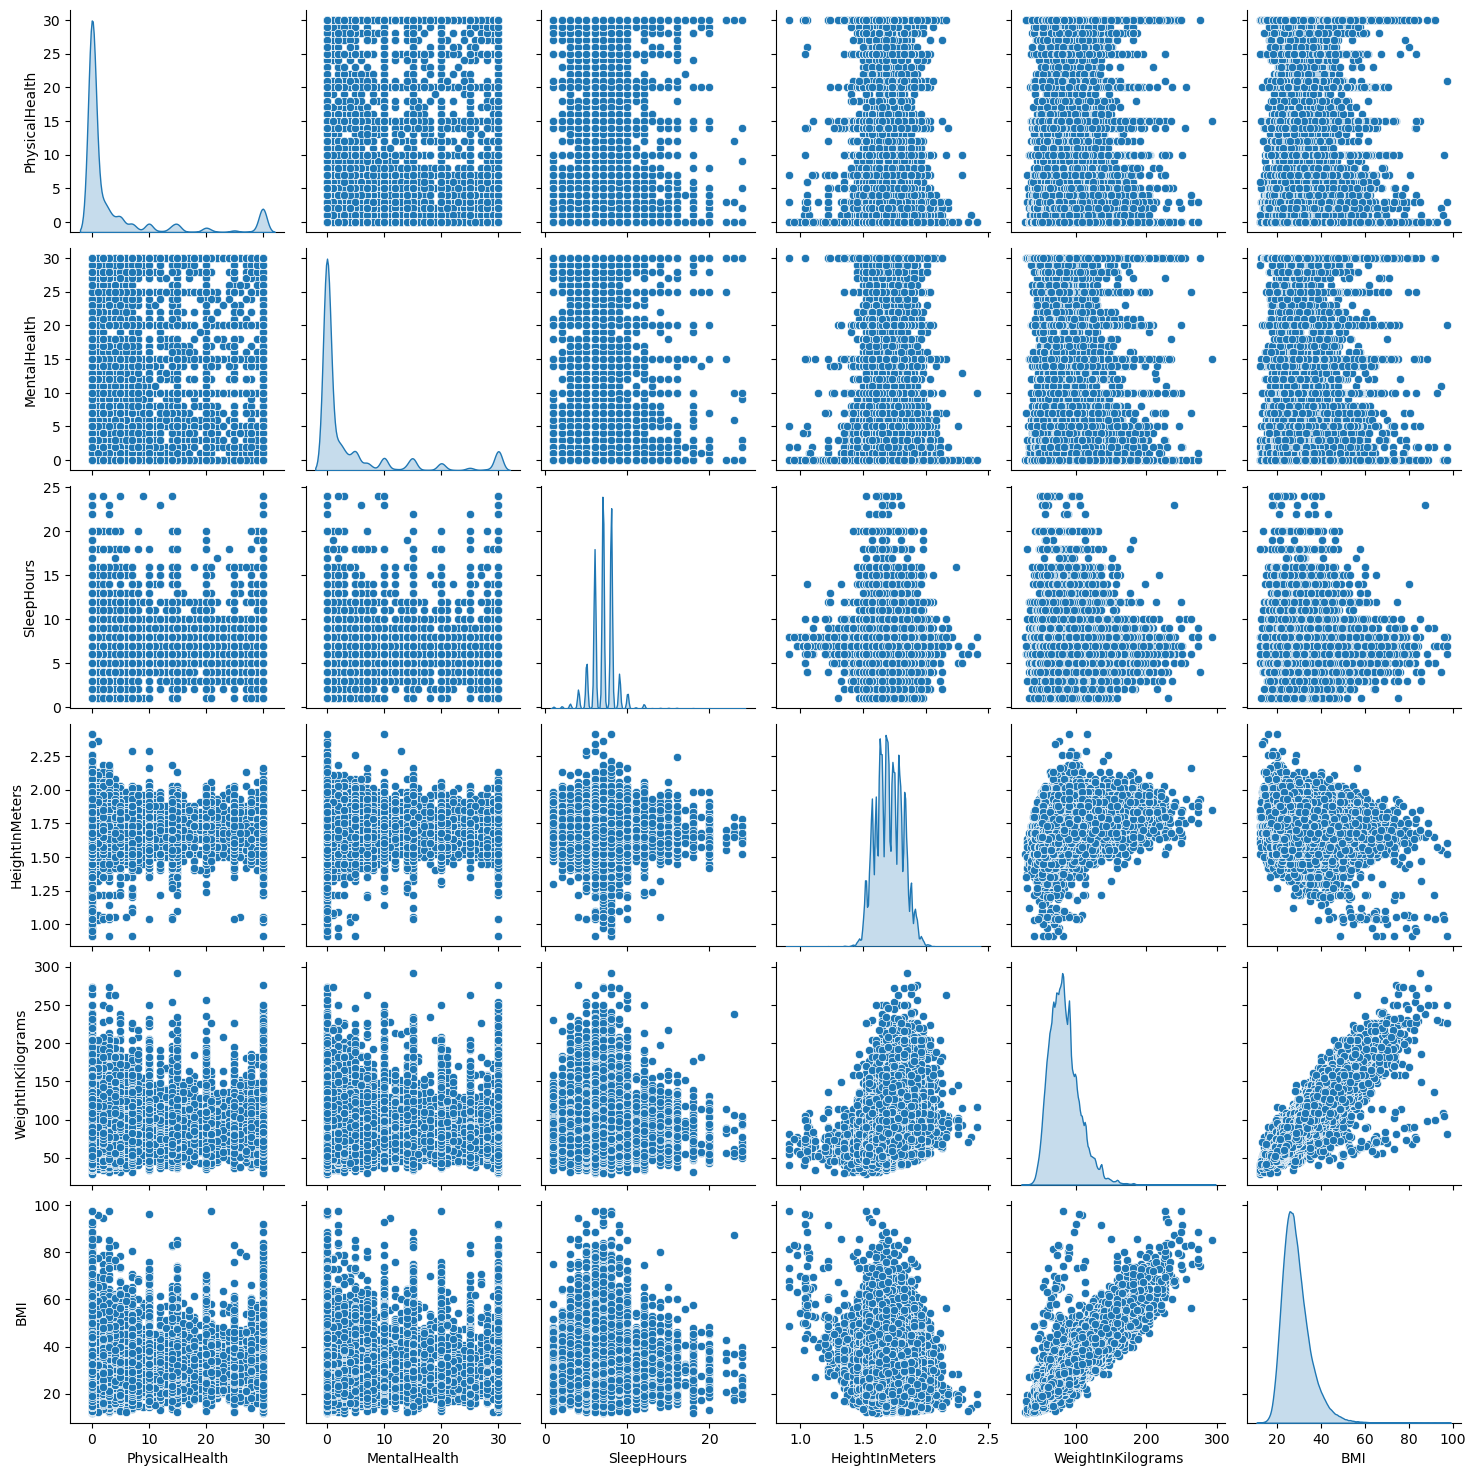

In [45]:
# Pair plot of numerical columns
sns.pairplot(df[numeric_cols], diag_kind='kde')
plt.show()

Distribution Of Variables:

PhysicalHealth & MentalHealth: Highly skewed with a large concentration at zero days. Most respondents report no poor health days, with fewer reporting a large number of such days.

SleepHours: Appears centered around a typical value (e.g., ~7 hours), but with some outliers reporting very low or very high sleep durations.

HeightInMeters: Roughly normal distribution around ~1.7 meters.

WeightInKilograms & BMI: Right-skewed distributions, indicating that while most individuals cluster around a certain median, there are outliers who are much heavier or have much higher BMIs.

Variables to Explore Further:

PhysicalHealth and MentalHealth: Due to their importance in public health these variables warrant more detailed analysis. Understanding whether certain groups (by age, gender, or activity level) differ in these measures can be valuable.

BMI and Weight: Given their strong correlation and importance to health outcomes, further exploration—perhaps segmenting by lifestyle factors like smoking status or physical activity—could offer insight into how behavior modulates body weight and composition.

SleepHours: Even though correlation is weak, it could still be insightful to explore subgroup patterns (e.g., whether those with very poor health outcomes also show abnormal sleep distributions) rather than a linear relationship.

## 5. Box Plot

/var/folders/43/fcmpd7jx0z18k499r5yr6q7r0000gn/T/ipykernel_90003/4148137785.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='PhysicalActivities', y='MentalHealth', data=df, palette='coolwarm')


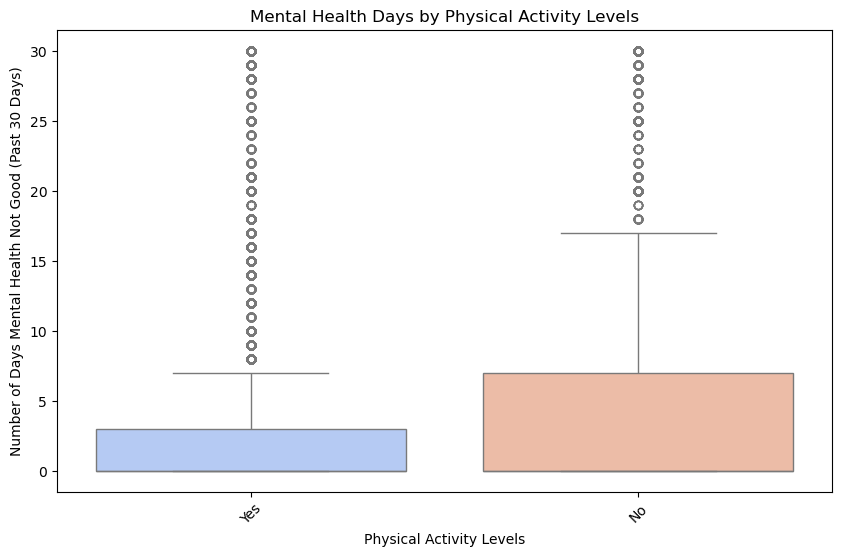

In [48]:
# Boxplot for PhysicalActivities and MentalHealth
plt.figure(figsize=(10, 6))
sns.boxplot(x='PhysicalActivities', y='MentalHealth', data=df, palette='coolwarm')
plt.title('Mental Health Days by Physical Activity Levels')
plt.xlabel('Physical Activity Levels')
plt.ylabel('Number of Days Mental Health Not Good (Past 30 Days)')
plt.xticks(rotation=45)
plt.show()

Individuals with Regular Physical Activity (Yes): The median and interquartile range are lower, indicating fewer days of poor mental health. They tend to report better mental health outcomes.

Individuals without Regular Physical Activity (No): The median is higher, and the spread is generally larger. This suggests that those not engaging in physical activity may experience more days of poor mental health, or at least there’s greater variability and a tendency towards worse mental health outcomes.

Interpretation: Engaging in physical activities appears to be associated with fewer mentally unhealthy days. While this does not prove causation (other factors could be influencing this relationship), it supports existing research indicating that regular physical activity can have beneficial mental health effects.

## 6. Revisit Questions

1. Relationship Between Heart Disease and Variables Such as Age, Sex, BMI, Smoking Status, and Physical Activity Levels.

   We have not yet specifically examined variables directly indicating heart disease (such as HadHeartAttack or HadAngina) in relation to demographic or lifestyle factors. Thus, we cannot draw conclusions on this question at this stage.

2. Relationship Between Lifestyle Choices (Smoking, Alcohol Consumption, Physical Activity) and Occurrence of Chronic Diseases.

   Our correlation and scatterplots did not directly compare lifestyle variables with chronic disease outcomes. We did, however, produce a boxplot comparing physical activity levels to mental health outcomes. This suggests that those who engage in regular physical activities report fewer days of poor mental health. While mental health is not the same as chronic disease, it is a critical aspect of overall health. This finding hints that lifestyle factors (at least physical activity) may be related to better health metrics.

3. Differences in Health Indicators Across Different States or Regions.

   This has not been explored in the current visual analysis yet. No conclusions at this stage.

4. Impact of Sleep Duration on Overall Health and Risk of Chronic Diseases.

   From the correlation analysis, SleepHours showed very weak correlations with other health indicators (e.g., BMI, PhysicalHealth, MentalHealth). There was no strong linear relationship, suggesting that the number of hours slept per day, on its own, may not be closely related to these particular health outcomes.

5. Correlation Between Mental Health Indicators and Physical Health Outcomes.

   We found a moderate positive correlation (around 0.31) between PhysicalHealth and MentalHealth. Individuals who reported more days of poor physical health also tended to report more days of poor mental health. While not a definitive causal relationship, it suggests that poorer physical health may be associated with poorer mental health.

6. Prevalence of Chronic Conditions (Heart Disease, Diabetes, COPD, Arthritis).

   We have not yet examined the categorical variables indicating the presence of chronic conditions.

## 7. New Questions

1. Do individuals with higher BMI also report more days of poor physical or mental health?

   Although BMI has a strong correlation with weight, we have not yet connected BMI to self-reported health days.

2. How do preventive behaviors (e.g., vaccinations, regular check-ups) correlate with reported physical and mental health days?

   Since this may indicate proactive health management, studying their relationships could help us understand the role of preventive care in overall wellbeing.

## 8. Hypotheses

1. Physical Activity and Mental Health Hypothesis: Individuals who engage in regular physical activity will have fewer reported days of poor mental health compared to individuals who do not engage in physical activity.

2. Physical and Mental Health Relationship Hypothesis: There is a positive association between the number of poor physical health days and the number of poor mental health days. Individuals reporting more days of poor physical health are more likely to report more days of poor mental health.

3. Preventive Care and Health Outcomes Hypothesis: Individuals who undergo regular preventive check-ups and vaccinations report fewer days of poor physical health compared to those who do not engage in these preventive measures.